<a href="https://colab.research.google.com/github/aashutoshPanda/House-price-prediction/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Imports

In [10]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import numpy as np

#Data Preparation

Getting the data to work on from keras

In [11]:
# With this we have our Training & Test data ready
(x_train, y_train), (x_test, y_test) = mnist.load_data()

We should have an idea of the data on which we are working

In [12]:
#the dimension of each image is 28 x 28
#So have many many matrices of dimension 28 x 28 as our training data
image_size = 784 # 28 x 28

print("original x_train shape",x_train.shape)

original x_train shape (60000, 28, 28)


Let's look at the images that we are provided 

Now we will flatten our images i.e. instead of keeping them as 2D vector of shape 28 x 28 they will be 1D vector of shape (784,)

In [13]:
# no. of images  = x_train.shape[0] because dimension was like (<how_many_matrices>,<no_of_row>,<no_of_column>)
print("Shape of training data before : ",x_train.shape)

x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

print("Shape of training data after : ",x_train.shape)

Shape of training data before :  (60000, 28, 28)
Shape of training data after :  (60000, 784)


After having flat images ready we will change the label

We have nos. from 0 to 9 to identify i.e. 10 classes
The thing with classification problems is that when our models predicts 
class 5 as class 8 then we can't say it's wrong by 3 places or something like that

So in classification we use one hot encoding to make this definite

In [14]:
num_classes = 10 #for images of 0 to 9

print("Shape of labels before : ",y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Shape of labels after : ",y_train.shape)


Shape of labels before :  (60000,)
Shape of labels after :  (60000, 10)


# Making ANN

1.   Input is an image (28 x 28) flattened to 784 so the input layer will have 784 nodes
2.   Here we are making ANN with only 1 hidden layer with 32 nodes
3.   Also the output layer will have 10 nodes
4.   The activation function that we'll be using is sigmoid 

In [15]:
model = Sequential()

#This is the hidden layer
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
#This is the output layer
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


The total params that can be changed overtime is 25,450 

    Input (784)       Hidden(32)        Output(10)
        |               |                |
        |               |                |
        |               |                |
  
There will be weight between each of the nodes in Input layer & Hidden layer 
= 784 * 32 = 25088

Similarly there will be weight between each of the nodes in Hidden layer & output layer
= 32 * 10 = 320

Also each percepton in the hidden layer & the output layer will have 1 bias
=32 + 10 = 42


Total = 25088 + 320 + 42 = 25450

#Training & Testing our model

The loss function will be **categorical cross entropy**
& the optimisation algorithm to be used will be **Stochastic Gradient Descent (SGD).**

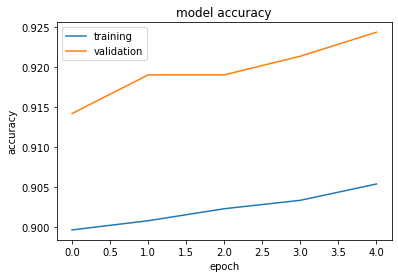

Test loss: 0.337
Test accuracy: 0.91


In [18]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')